<a href="https://colab.research.google.com/github/Marouane-Elgoumiri/Linkedin_mining_data/blob/main/Linkedin_Data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing data from Linkedin

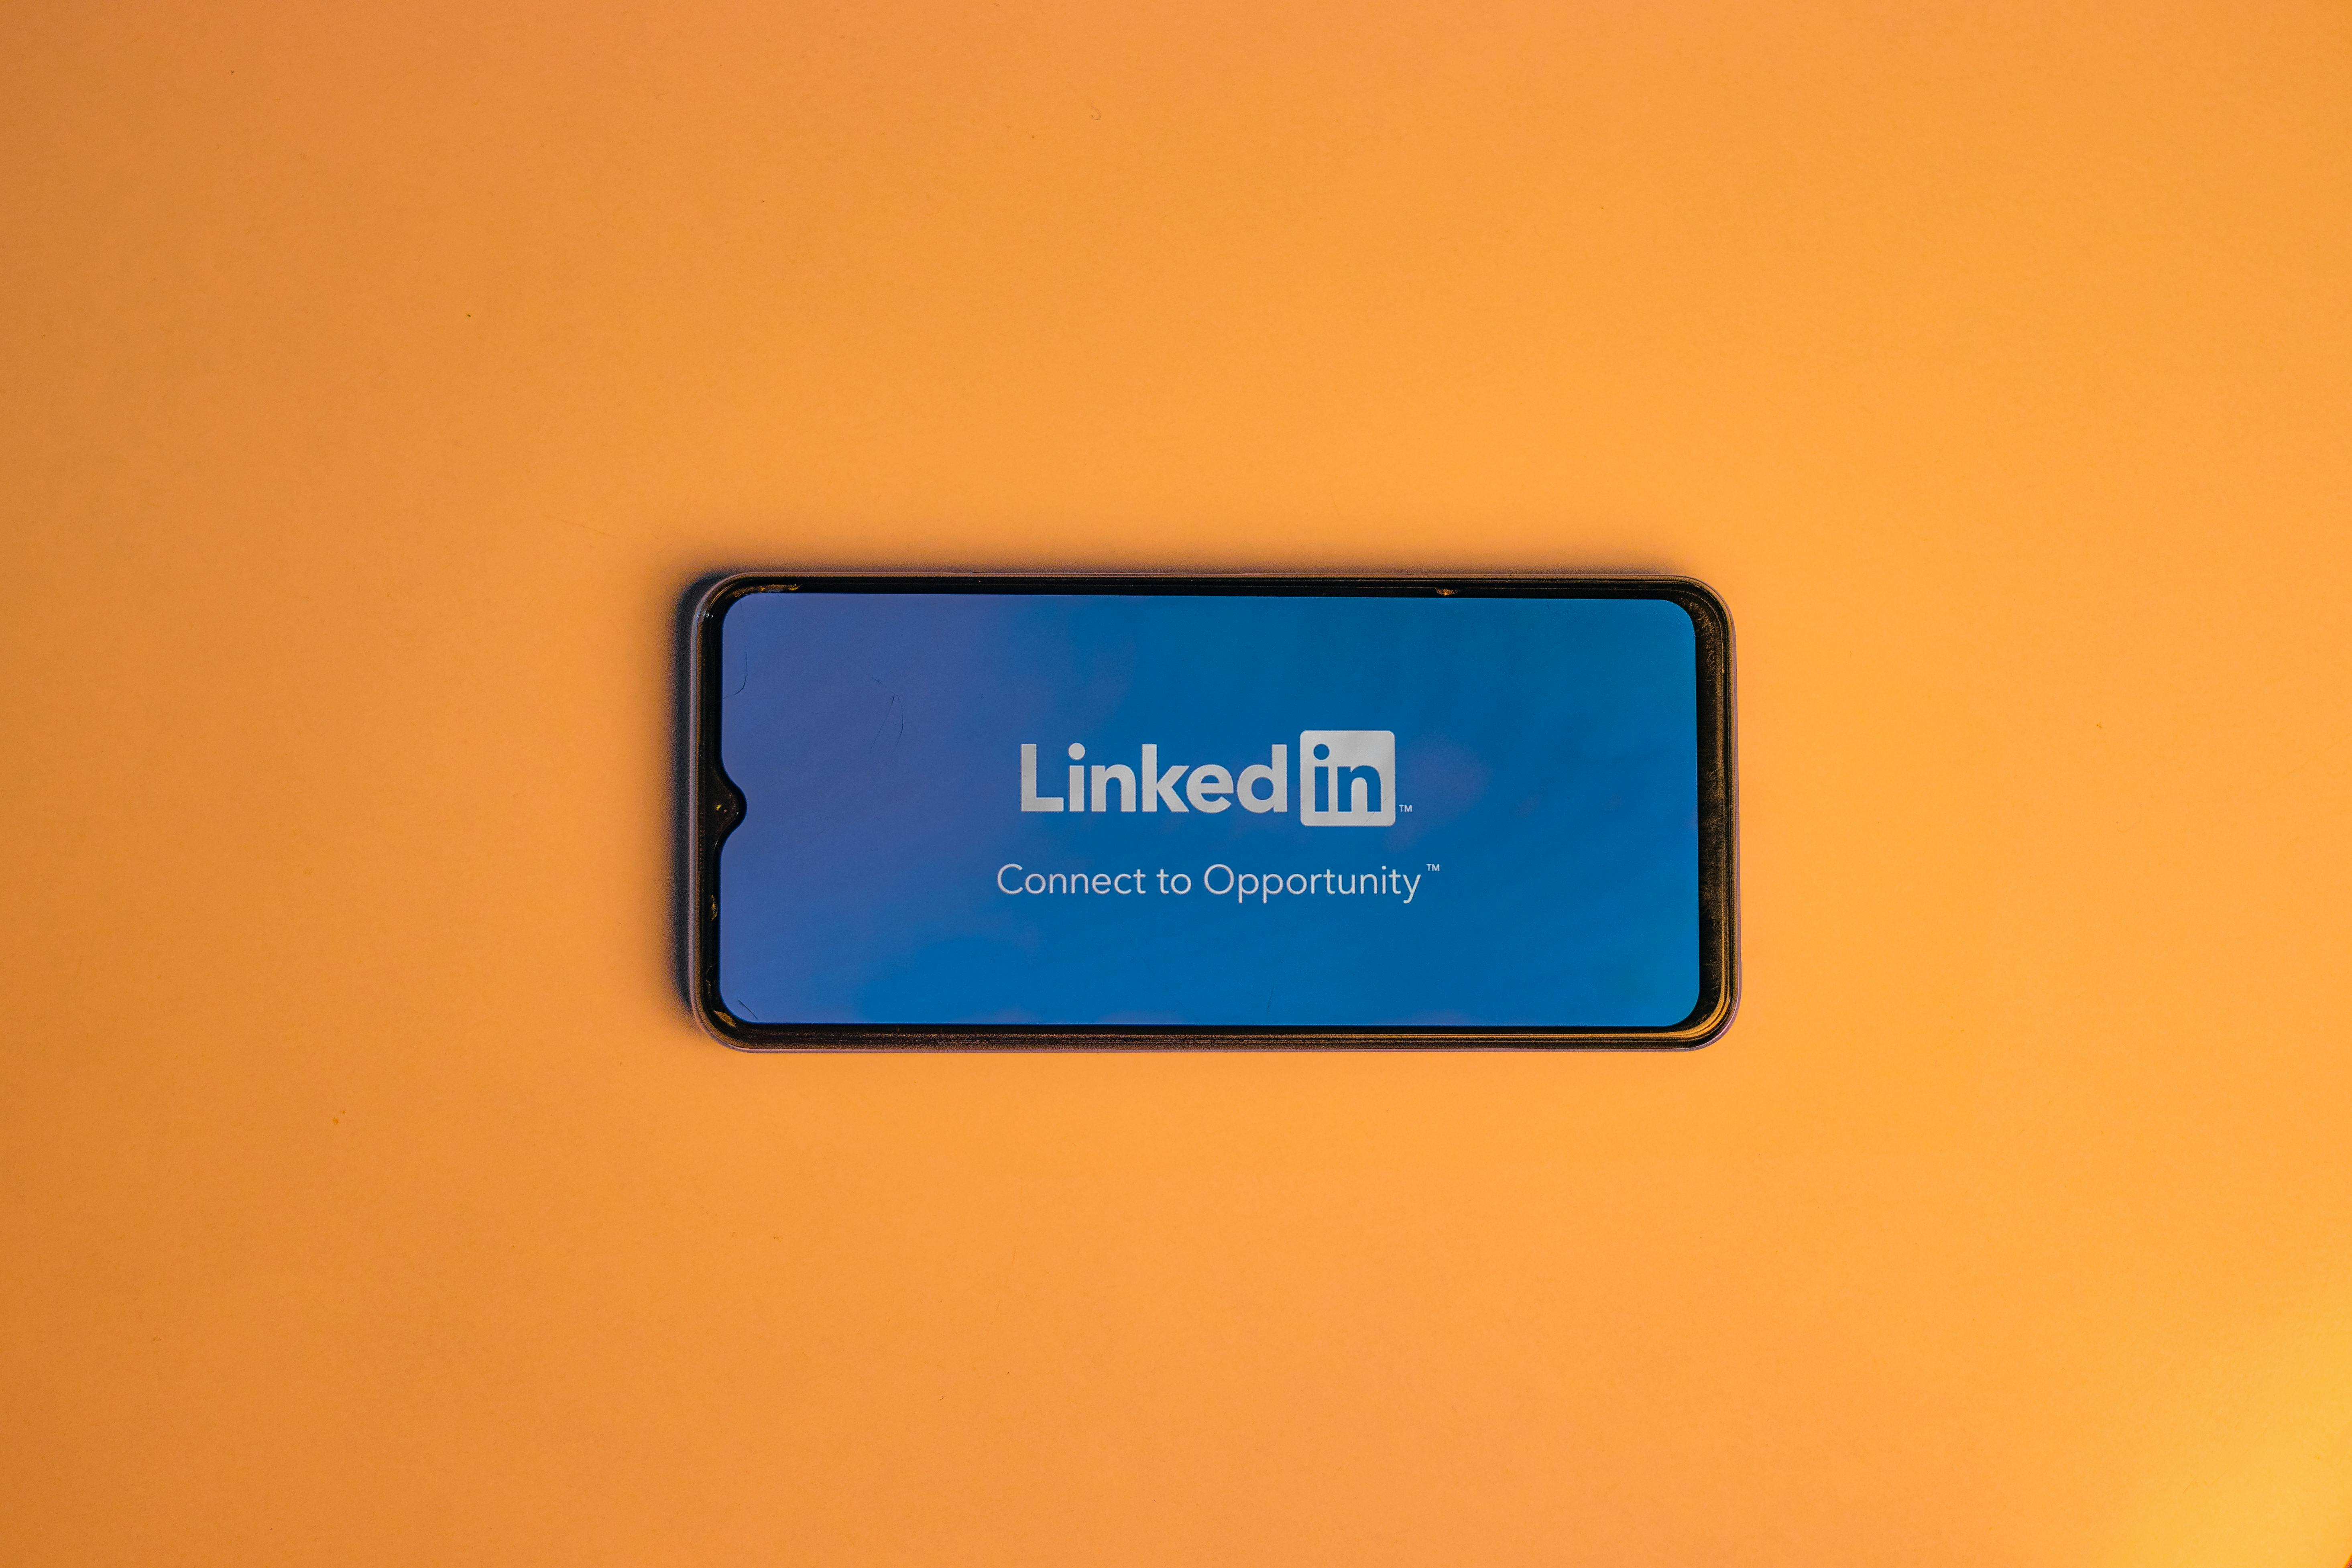


## Connection dataset

### Number of connections by period

---



In [ ]:
!pip install --upgrade plotly

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.4/16.4 MB 30.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import datetime
from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


### Data importation

In [59]:
connections = pd.read_csv('/content/drive/MyDrive/linkedin_data_mining/Connections.csv')

In [60]:
connections.head(10)

First Name     Last Name  \
0           Brahim        KNIOUI   
1             Adil      Charahil   
2         Soufiane         AMINE   
3           Ismail   AIT WAHMANE   
4          Mahmoud  Hagras _ MBA   
5            Aymen         Mkais   
6            Zineb       HIJAOUY   
7  Oufaress Brahim        MIRSAL   
8            Imane       Erguiti   
9             ANAS      ET-TAYEA   

                                                 URL  \
0          https://www.linkedin.com/in/brahim-knioui   
1           https://www.linkedin.com/in/adilcharahil   
2  https://www.linkedin.com/in/soufiane-amine-a08...   
3     https://www.linkedin.com/in/ismail-ait-wahmane   
4  https://www.linkedin.com/in/mahmoud-hagras-mba...   
5  https://www.linkedin.com/in/aymen-mkais-4036b5255   
6          https://www.linkedin.com/in/zineb-hijaouy   
7  https://www.linkedin.com/in/oufaress-brahim-mi...   
8          https://www.linkedin.com/in/imane-erguiti   
9          https://www.linkedin.com/in/anas-et-tayea   

               Email Address                Company  \
0                        NaN  Universit√© Cadi Ayyad   
1                        NaN          MetaMa-agency   
2                        NaN              Microdata   
3                        NaN   ARK-X Talent Factory   
4  mahmoudhagras39@gmail.com      thameen al themar   
5                        NaN       Brock University   
6                        NaN      Pharma 5 Officiel   
7                        NaN           Confidentiel   
8                        NaN                 Oracle   
9                        NaN                Akkodis   

                           Position Connected On  
0          PSSI and ISO 27001 Audit  09 May 2024  
1               Wordpress Developer  09 May 2024  
2           Technicien informatique  09 May 2024  
3                         Stagiaire  09 May 2024  
4  Vice President-thameen al themar  09 May 2024  
5                  Exchange Student  09 May 2024  
6                  Coordinatrice RH  09 May 2024  
7                        Consultant  09 May 2024  
8                 Software Engineer  09 May 2024  
9        Talent Acquisition Officer  09 May 2024

In [15]:
def change_date(dato):
  return datetime.datetime.strptime(dato, '%d %b %Y').strftime('%Y-%m-%d')

In [16]:
connections['Connected On'] = connections['Connected On'].apply(change_date)

In [17]:
connections.head(10)

First Name     Last Name  \
0           Brahim        KNIOUI   
1             Adil      Charahil   
2         Soufiane         AMINE   
3           Ismail   AIT WAHMANE   
4          Mahmoud  Hagras _ MBA   
5            Aymen         Mkais   
6            Zineb       HIJAOUY   
7  Oufaress Brahim        MIRSAL   
8            Imane       Erguiti   
9             ANAS      ET-TAYEA   

                                                 URL  \
0          https://www.linkedin.com/in/brahim-knioui   
1           https://www.linkedin.com/in/adilcharahil   
2  https://www.linkedin.com/in/soufiane-amine-a08...   
3     https://www.linkedin.com/in/ismail-ait-wahmane   
4  https://www.linkedin.com/in/mahmoud-hagras-mba...   
5  https://www.linkedin.com/in/aymen-mkais-4036b5255   
6          https://www.linkedin.com/in/zineb-hijaouy   
7  https://www.linkedin.com/in/oufaress-brahim-mi...   
8          https://www.linkedin.com/in/imane-erguiti   
9          https://www.linkedin.com/in/anas-et-tayea   

               Email Address                Company  \
0                        NaN  Universit√© Cadi Ayyad   
1                        NaN          MetaMa-agency   
2                        NaN              Microdata   
3                        NaN   ARK-X Talent Factory   
4  mahmoudhagras39@gmail.com      thameen al themar   
5                        NaN       Brock University   
6                        NaN      Pharma 5 Officiel   
7                        NaN           Confidentiel   
8                        NaN                 Oracle   
9                        NaN                Akkodis   

                           Position Connected On  
0          PSSI and ISO 27001 Audit   2024-05-09  
1               Wordpress Developer   2024-05-09  
2           Technicien informatique   2024-05-09  
3                         Stagiaire   2024-05-09  
4  Vice President-thameen al themar   2024-05-09  
5                  Exchange Student   2024-05-09  
6                  Coordinatrice RH   2024-05-09  
7                        Consultant   2024-05-09  
8                 Software Engineer   2024-05-09  
9        Talent Acquisition Officer   2024-05-09

In [18]:
# Merging the Full Name & Last Name into Full Name

connections['Full Name'] = connections['First Name'].str.cat(connections['Last Name'], sep=' ')
connection = connections.drop(columns=['First Name', 'Last Name'])
connection.head(10)

URL  \
0          https://www.linkedin.com/in/brahim-knioui   
1           https://www.linkedin.com/in/adilcharahil   
2  https://www.linkedin.com/in/soufiane-amine-a08...   
3     https://www.linkedin.com/in/ismail-ait-wahmane   
4  https://www.linkedin.com/in/mahmoud-hagras-mba...   
5  https://www.linkedin.com/in/aymen-mkais-4036b5255   
6          https://www.linkedin.com/in/zineb-hijaouy   
7  https://www.linkedin.com/in/oufaress-brahim-mi...   
8          https://www.linkedin.com/in/imane-erguiti   
9          https://www.linkedin.com/in/anas-et-tayea   

               Email Address                Company  \
0                        NaN  Universit√© Cadi Ayyad   
1                        NaN          MetaMa-agency   
2                        NaN              Microdata   
3                        NaN   ARK-X Talent Factory   
4  mahmoudhagras39@gmail.com      thameen al themar   
5                        NaN       Brock University   
6                        NaN      Pharma 5 Officiel   
7                        NaN           Confidentiel   
8                        NaN                 Oracle   
9                        NaN                Akkodis   

                           Position Connected On               Full Name  
0          PSSI and ISO 27001 Audit   2024-05-09           Brahim KNIOUI  
1               Wordpress Developer   2024-05-09           Adil Charahil  
2           Technicien informatique   2024-05-09          Soufiane AMINE  
3                         Stagiaire   2024-05-09      Ismail AIT WAHMANE  
4  Vice President-thameen al themar   2024-05-09    Mahmoud Hagras _ MBA  
5                  Exchange Student   2024-05-09             Aymen Mkais  
6                  Coordinatrice RH   2024-05-09           Zineb HIJAOUY  
7                        Consultant   2024-05-09  Oufaress Brahim MIRSAL  
8                 Software Engineer   2024-05-09           Imane Erguiti  
9        Talent Acquisition Officer   2024-05-09           ANAS ET-TAYEA

In [20]:
graph = px.scatter(connection, x = 'Full Name', y='Connected On')
graph.show()

In [22]:
connection.groupby(by = "Connected On").count()

URL  Email Address  Company  Position  Full Name
Connected On                                                  
2021-02-23      1              0        1         1          1
2021-02-24      3              0        3         3          3
2021-02-26      1              0        1         1          1
2021-02-28      1              0        1         1          1
2021-03-04      4              0        1         1          4
...           ...            ...      ...       ...        ...
2024-05-05     15              0       12        12         15
2024-05-06     17              0       14        14         17
2024-05-07     31              2       28        28         31
2024-05-08      5              0        4         4          5
2024-05-09     17              2       17        17         17

[244 rows x 5 columns]

In [27]:
graph = px.line(connection.groupby(by = "Connected On").count(), title="New Connections per Date")
graph.show()

Note: significant increase in the last 5 months, with April 2024 had the most count of connections

### Group Connection by month

In [30]:
def set_month(date):
  return datetime.datetime.strptime(date, '%Y-%m-%d').strftime("%m")

connection['Connected Month'] = connection['Connected On'].apply(set_month)
connection

URL  \
0             https://www.linkedin.com/in/brahim-knioui   
1              https://www.linkedin.com/in/adilcharahil   
2     https://www.linkedin.com/in/soufiane-amine-a08...   
3        https://www.linkedin.com/in/ismail-ait-wahmane   
4     https://www.linkedin.com/in/mahmoud-hagras-mba...   
...                                                 ...   
1264      https://www.linkedin.com/in/haytam-el-youssfi   
1265       https://www.linkedin.com/in/abderrahim-tanan   
1266      https://www.linkedin.com/in/naaima-ben-kadour   
1267         https://www.linkedin.com/in/amina-alhaouil   
1268         https://www.linkedin.com/in/marwane-echari   

                  Email Address                                    Company  \
0                           NaN                      Universit√© Cadi Ayyad   
1                           NaN                              MetaMa-agency   
2                           NaN                                  Microdata   
3                           NaN                       ARK-X Talent Factory   
4     mahmoudhagras39@gmail.com                          thameen al themar   
...                         ...                                        ...   
1264                        NaN  UM6P - Mohammed VI Polytechnic University   
1265                        NaN                                   KaronCar   
1266                        NaN                                   PCS AGRI   
1267                        NaN                      Universidad de Murcia   
1268                        NaN                                   AGRI 4.0   

                              Position Connected On             Full Name  \
0             PSSI and ISO 27001 Audit   2024-05-09         Brahim KNIOUI   
1                  Wordpress Developer   2024-05-09         Adil Charahil   
2              Technicien informatique   2024-05-09        Soufiane AMINE   
3                            Stagiaire   2024-05-09    Ismail AIT WAHMANE   
4     Vice President-thameen al themar   2024-05-09  Mahmoud Hagras _ MBA   
...                                ...          ...                   ...   
1264         Researcher Ph.D Candidate   2021-02-26     HAYTAM EL YOUSSFI   
1265      Mobile Application Developer   2021-02-24      Abderrahim TANAN   
1266             Data Science Engineer   2021-02-24     Naaima BEN KADOUR   
1267                    Data Scientist   2021-02-24        Amina ALHAOUIL   
1268             Spring Boot Developer   2021-02-23        Marwane Echari   

     Connected Month  
0                 05  
1                 05  
2                 05  
3                 05  
4                 05  
...              ...  
1264              02  
1265              02  
1266              02  
1267              02  
1268              02  

[1269 rows x 7 columns]

In [36]:
graph = px.line(connection.groupby(by = 'Connected Month').count(), title="New connections by month")
graph.show()

Spring (March & April) had the most connections made & stagnation in the summer season

### Group connection by Year

In [32]:
def set_year(date):
  return datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%Y')

connection['Connected Year'] = connection['Connected On'].apply(set_year)
connection

URL  \
0             https://www.linkedin.com/in/brahim-knioui   
1              https://www.linkedin.com/in/adilcharahil   
2     https://www.linkedin.com/in/soufiane-amine-a08...   
3        https://www.linkedin.com/in/ismail-ait-wahmane   
4     https://www.linkedin.com/in/mahmoud-hagras-mba...   
...                                                 ...   
1264      https://www.linkedin.com/in/haytam-el-youssfi   
1265       https://www.linkedin.com/in/abderrahim-tanan   
1266      https://www.linkedin.com/in/naaima-ben-kadour   
1267         https://www.linkedin.com/in/amina-alhaouil   
1268         https://www.linkedin.com/in/marwane-echari   

                  Email Address                                    Company  \
0                           NaN                      Universit√© Cadi Ayyad   
1                           NaN                              MetaMa-agency   
2                           NaN                                  Microdata   
3                           NaN                       ARK-X Talent Factory   
4     mahmoudhagras39@gmail.com                          thameen al themar   
...                         ...                                        ...   
1264                        NaN  UM6P - Mohammed VI Polytechnic University   
1265                        NaN                                   KaronCar   
1266                        NaN                                   PCS AGRI   
1267                        NaN                      Universidad de Murcia   
1268                        NaN                                   AGRI 4.0   

                              Position Connected On             Full Name  \
0             PSSI and ISO 27001 Audit   2024-05-09         Brahim KNIOUI   
1                  Wordpress Developer   2024-05-09         Adil Charahil   
2              Technicien informatique   2024-05-09        Soufiane AMINE   
3                            Stagiaire   2024-05-09    Ismail AIT WAHMANE   
4     Vice President-thameen al themar   2024-05-09  Mahmoud Hagras _ MBA   
...                                ...          ...                   ...   
1264         Researcher Ph.D Candidate   2021-02-26     HAYTAM EL YOUSSFI   
1265      Mobile Application Developer   2021-02-24      Abderrahim TANAN   
1266             Data Science Engineer   2021-02-24     Naaima BEN KADOUR   
1267                    Data Scientist   2021-02-24        Amina ALHAOUIL   
1268             Spring Boot Developer   2021-02-23        Marwane Echari   

     Connected Month Connected Year  
0                 05           2024  
1                 05           2024  
2                 05           2024  
3                 05           2024  
4                 05           2024  
...              ...            ...  
1264              02           2021  
1265              02           2021  
1266              02           2021  
1267              02           2021  
1268              02           2021  

[1269 rows x 8 columns]

In [37]:
graph= px.line(connection.groupby(by= 'Connected Year').count(), title = 'New Connection by year')
graph.show()

Note: Significant increase in the last year

### Companies


In [61]:
connections

First Name     Last Name  \
0         Brahim        KNIOUI   
1           Adil      Charahil   
2       Soufiane         AMINE   
3         Ismail   AIT WAHMANE   
4        Mahmoud  Hagras _ MBA   
...          ...           ...   
1264      HAYTAM    EL YOUSSFI   
1265  Abderrahim         TANAN   
1266      Naaima    BEN KADOUR   
1267       Amina      ALHAOUIL   
1268     Marwane        Echari   

                                                    URL  \
0             https://www.linkedin.com/in/brahim-knioui   
1              https://www.linkedin.com/in/adilcharahil   
2     https://www.linkedin.com/in/soufiane-amine-a08...   
3        https://www.linkedin.com/in/ismail-ait-wahmane   
4     https://www.linkedin.com/in/mahmoud-hagras-mba...   
...                                                 ...   
1264      https://www.linkedin.com/in/haytam-el-youssfi   
1265       https://www.linkedin.com/in/abderrahim-tanan   
1266      https://www.linkedin.com/in/naaima-ben-kadour   
1267         https://www.linkedin.com/in/amina-alhaouil   
1268         https://www.linkedin.com/in/marwane-echari   

                  Email Address                                    Company  \
0                           NaN                      Universit√© Cadi Ayyad   
1                           NaN                              MetaMa-agency   
2                           NaN                                  Microdata   
3                           NaN                       ARK-X Talent Factory   
4     mahmoudhagras39@gmail.com                          thameen al themar   
...                         ...                                        ...   
1264                        NaN  UM6P - Mohammed VI Polytechnic University   
1265                        NaN                                   KaronCar   
1266                        NaN                                   PCS AGRI   
1267                        NaN                      Universidad de Murcia   
1268                        NaN                                   AGRI 4.0   

                              Position Connected On  
0             PSSI and ISO 27001 Audit  09 May 2024  
1                  Wordpress Developer  09 May 2024  
2              Technicien informatique  09 May 2024  
3                            Stagiaire  09 May 2024  
4     Vice President-thameen al themar  09 May 2024  
...                                ...          ...  
1264         Researcher Ph.D Candidate  26 Feb 2021  
1265      Mobile Application Developer  24 Feb 2021  
1266             Data Science Engineer  24 Feb 2021  
1267                    Data Scientist  24 Feb 2021  
1268             Spring Boot Developer  23 Feb 2021  

[1269 rows x 7 columns]

In [71]:
connections['Company'] = connections['Company'].astype(str)
np.unique(connections['Company'], return_counts=True)


(array([' ', ' Facult√© Polydisciplinaire Taroudant', ' Maroc Datacenter',
        ' assistant administratif', '1337 Future Is Loading', '1Trav',
        '2C Solution', '2M TV', '2PointLogic', '2r technology',
        '3D Smart Factory', '3WM', '4D', '4Tech Lab', '7-Eleven',
        '9rayti.Com', 'A&T Experts', 'A.V.E.', 'A2S Junior-Entreprise',
        'AACSB', 'ACENSI', 'ADE ENSA Agadir ', 'ADMDI',
        'ADMISSION INTERNATIONALE', 'AEVAweb', 'AFFAIRINO', 'AGI Maroc',
        'AGRI 4.0', 'AGRIDATA CONSULTING', 'AI Guild', 'AIESEC Morocco',
        'AIMPACTIFY MAROC', 'AJICOD', 'AJICOD AGENCY', 'AJICOD INSTITUTE',
        'AKDITAL', 'AL MORAFIQ ', 'ALEIA', 'ALEXSYS SOLUTIONS',
        'ALM Solutions ', 'ALTEN', 'ALTEN MAROC', 'ALVEOLE DU MAROC',
        'ALX Morocco', 'AM ASSOCIES', 'ARHS Developments Belgium',
        'ARK-X Talent Factory', 'ARKx Education', 'ASUFE CPC', 'AVL',
        'AXI Technologies', 'AYMD', 'AYOUR CONCEPT SARL',
        'Abdul Latif Jameel Finance - Egypt', 

In [63]:
connections.shape

(1269, 7)

In [64]:
len(np.unique(connections['Company']))

731

‚ÑπÔ∏è Note: 1269 connections work for 731 unique companies

In [65]:
graph= px.histogram(connections['Company'])
graph.show()

‚ÑπÔ∏è Note: 206 connections does not work in any company &
      "ARK-X Talent Factory" has the most count of working connections"

In [66]:
graph = px.treemap(connections, path=["Company"])
graph.show()

In [67]:
#fixing the non-leaf rows error
connec = connections[connections.groupby('Company')['Position'].transform(pd.Series.nunique) == 1]

graph = px.treemap(connec, path=["Company","Position"])
graph.show()

‚ÑπÔ∏è Note: Dominant companies & roles

#### Grouping companies by position & connections names:

In [69]:
# fixing the error of rows with null values:
connection = connection.dropna(subset=["Company"])

graph = px.treemap(connection, path=["Company","Position","Full Name"])
graph.show()

üí° Idea: We could visualize each connection with his/her cv in each company section

### Position (job_titles)

In [72]:
connections['Position'] = connections['Position'].astype(str)
np.unique(connections['Position'], return_counts='True')

(array([' Brilliant Black Minds Member',
        ' Full Stack Software Engineer Intern',
        ' Full-Stack Software Engineer',
        ' Ing√©nieur Concepteur D√©veloppeur JavaScript ',
        ' Senior Cyber Security Specialist', ' full stack engineer ',
        '3D Developer | Data Scientist', 'AACSB On Board Member ',
        'AI Developer', 'AI engineer', 'AI/KM Researcher',
        'AI/ML Developer', 'ALX AiCE - AI Career Essentials Student',
        'ALX Student', 'ALX_AiCE', 'Acheteuse / Contr√¥leuse de Gestion',
        'Adjoint du PDG', "Administrateur de Syst√®mes et d'applications",
        'Administrateur r√©seau et syst√®mes', 'Administrateur ventes',
        'Administrative Manager', 'Advertising Media Buyer',
        'Agent Mailer', 'Agent RH', 'Agent Rh / Aide Magasinier ',
        'Agent administratif polyvalent ', 'Agent commercial',
        'AiCE - AI Career Student ', 'Alumni', 'Analyst',
        'Analyst - Middle East', 'Analyst Developer',
        'Analyste m√©

In [73]:
connections.shape

(1269, 7)

In [75]:
len(np.unique(connections['Position']))

723

‚ÑπÔ∏è Note: 723 unique position/job

In [76]:
graph = px.histogram(connection['Position'])
graph.show()

‚ÑπÔ∏è Note: Most connections have "Full-Stack Developer" as position

In [80]:
#dropping the labels which have nan or "non existant":
connecto = connection.dropna(subset=['Position'])

graph = px.treemap(connecto, path = ["Position","Full Name"])
graph.show()

## Invitations dataset

In [82]:
invites = pd.read_csv('/content/drive/MyDrive/linkedin_data_mining/Invitations.csv')


In [83]:
invites.head(10)

From                      To           Sent At  Message  \
0  Marwan El Goumiri           Brahim KNIOUI   5/9/24, 1:17 PM      NaN   
1  Marwan El Goumiri    Mahmoud Hagras _ MBA  5/9/24, 11:10 AM      NaN   
2  Marwan El Goumiri          Soufiane AMINE  5/9/24, 10:33 AM      NaN   
3  Marwan El Goumiri        Youssef Bousrour  5/9/24, 10:33 AM      NaN   
4  Marwan El Goumiri             Aymen Mkais  5/9/24, 10:33 AM      NaN   
5  Marwan El Goumiri           Zineb HIJAOUY  5/9/24, 10:31 AM      NaN   
6  Marwan El Goumiri      Ismail AIT WAHMANE  5/9/24, 10:30 AM      NaN   
7  Marwan El Goumiri           Adil Charahil  5/9/24, 10:30 AM      NaN   
8  Marwan El Goumiri  Oufaress Brahim MIRSAL  5/9/24, 10:30 AM      NaN   
9  Marwan El Goumiri        Abdelhalim Sabry   5/8/24, 5:20 PM      NaN   

  Direction                              inviterProfileUrl  \
0  OUTGOING  https://www.linkedin.com/in/marwan-el-goumiri   
1  OUTGOING  https://www.linkedin.com/in/marwan-el-goumiri   
2  OUTGOING  https://www.linkedin.com/in/marwan-el-goumiri   
3  OUTGOING  https://www.linkedin.com/in/marwan-el-goumiri   
4  OUTGOING  https://www.linkedin.com/in/marwan-el-goumiri   
5  OUTGOING  https://www.linkedin.com/in/marwan-el-goumiri   
6  OUTGOING  https://www.linkedin.com/in/marwan-el-goumiri   
7  OUTGOING  https://www.linkedin.com/in/marwan-el-goumiri   
8  OUTGOING  https://www.linkedin.com/in/marwan-el-goumiri   
9  OUTGOING  https://www.linkedin.com/in/marwan-el-goumiri   

                                   inviteeProfileUrl  
0          https://www.linkedin.com/in/brahim-knioui  
1  https://www.linkedin.com/in/mahmoud-hagras-mba...  
2  https://www.linkedin.com/in/soufiane-amine-a08...  
3        https://www.linkedin.com/in/bousrouryoussef  
4  https://www.linkedin.com/in/aymen-mkais-4036b5255  
5          https://www.linkedin.com/in/zineb-hijaouy  
6     https://www.linkedin.com/in/ismail-ait-wahmane  
7           https://www.linkedin.com/in/adilcharahil  
8  https://www.linkedin.com/in/oufaress-brahim-mi...  
9  https://www.linkedin.com/in/abdelhalim-sabry-4...